In [1]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

In [7]:
model = yolov8_heatmap(
    weight="weights/best.pt",
    method="GradCAM",
    show_box=False
)

Model summary: 225 layers, 3012798 parameters, 0 gradients


In [8]:
SAMPLE_IMG="C:\\Users\\haksh\\Documents\\CALSS MATERIALS\\SEM7\\Capstone\\datasets\\VisDrone\\VisDrone2019-DET-train\\images\\0000263_00001_d_0000173.jpg"

In [9]:
imagelist = model(
    img_path=SAMPLE_IMG
    )

c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explainer\YOLOv8_Explainer\core.py:140: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  if float(post_result[i].max()) >= self.conf:


In [10]:
len(imagelist)

1

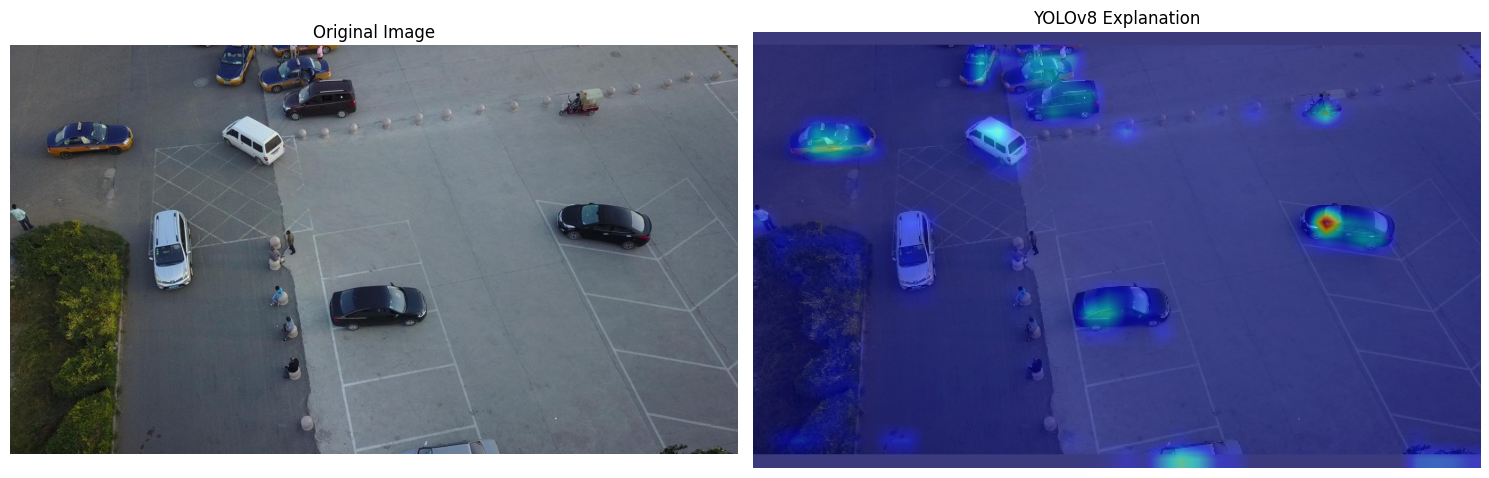

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# Load original image
original_img = Image.open(SAMPLE_IMG)

# Create subplot to show original and explanation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Show original image
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show explanation image
axes[1].imshow(imagelist[0])
axes[1].set_title("YOLOv8 Explanation")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients


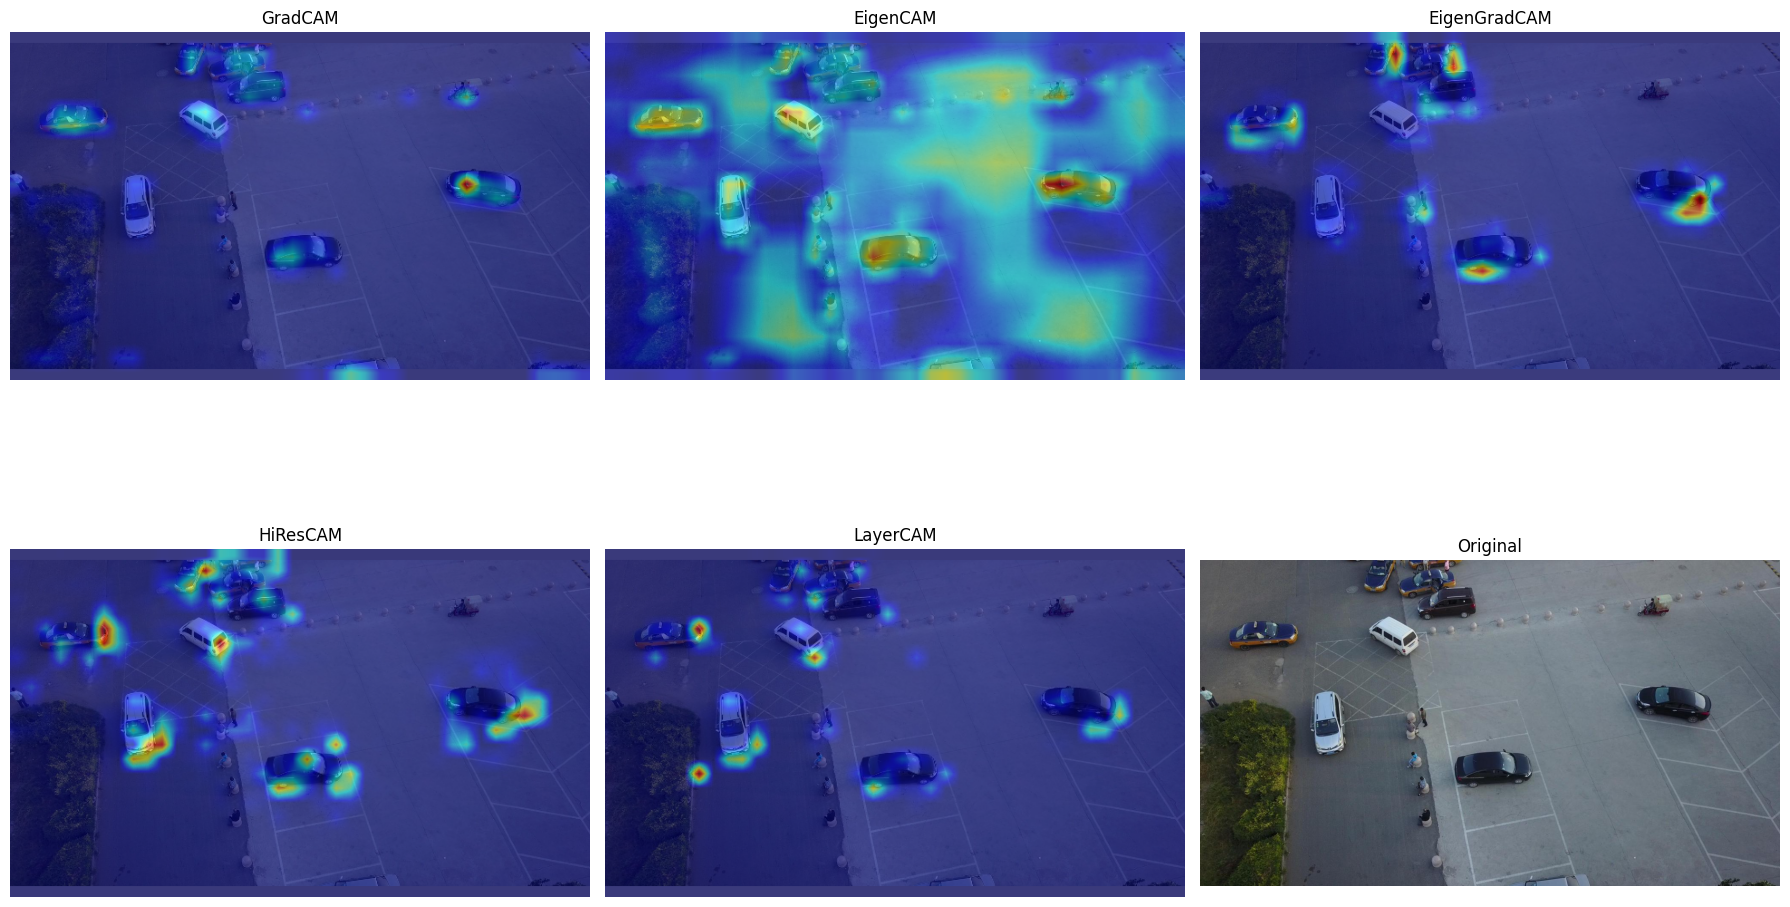

In [12]:
methods = ["GradCAM", "EigenCAM", "EigenGradCAM", "HiResCAM", "LayerCAM"]
results = {}

for method in methods:
    model = yolov8_heatmap(weight="weights/best.pt", method=method, show_box=False)
    results[method] = model(img_path=SAMPLE_IMG)[0]

# Create comparison grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, (method, img) in enumerate(results.items()):
    row, col = i // 3, i % 3
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"{method}")
    axes[row, col].axis('off')
axes[1, 2].imshow(original_img)
axes[1, 2].set_title("Original")
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

In [13]:
%pip install streamlit

  Using cached narwhals-2.5.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.1 MB 1.1 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/10.1 MB 932.9 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/10.1 MB 968.5 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/10.1 MB 987.4 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/10.1 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/10.1 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/10.1 MB 1.0 MB/s eta 0:00:09
   ------- -------------------------------- 1.8/10.1 MB 868.0 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/10.1 MB 868.0 kB/s eta 0:00:10
   -------- -----------

In [14]:
# Using streamlit or gradio
import streamlit as st
from PIL import Image

st.title("YOLOv8 Explainer")
uploaded_file = st.file_uploader("Choose an image...")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Original Image")
    
    # Generate explanation
    imagelist = model(img_path=image)  # You'd need to modify model to accept PIL images
    
    st.image(imagelist[0], caption="Explanation")

2025-09-25 13:56:00.579 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 13:56:01.113 
  command:

    streamlit run c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explainer\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-25 13:56:01.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 13:56:01.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 13:56:01.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 13:56:01.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 13:56:01.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare 